In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/PPL')
from PIL import Image
import os
import time
import csv
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import VisionEncoderDecoderModel, TrOCRProcessor
from trocr.src.main import *

In [3]:
def calculate_word_accuracy(label_sentence, predict_sentence):
    # Chia câu văn bản thành các từ
    label_words = label_sentence.split()
    predict_words = predict_sentence.split()

    words_correct = 0
    words_misspelled = 0
    words_skipped = 0
    words_added = 0

    # Tạo các tập hợp từ để so sánh
    label_set = set(label_words)
    predict_set = set(predict_words)

    # Tính số từ đúng (có trong cả hai câu và đúng thứ tự)
    words_correct = len(label_set.intersection(predict_set))

    # Tính số từ sai chính tả và bỏ qua
    for word in label_words:
        if word not in predict_set:
            words_misspelled += 1

    # Tính số từ thêm vào
    for word in predict_words:
        if word not in label_set:
            words_added += 1

    # Tính số từ bỏ qua
    words_skipped = len(label_words) - words_correct - words_misspelled

    # Tính toán Word Accuracy
    word_accuracy = words_correct / (words_correct + words_misspelled + words_skipped + words_added)

    return word_accuracy

In [4]:
def load_csv_labels(csv_path) -> dict[str, str]:

    labels: dict[str, str] = {}
    with open(csv_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for row in reader:
            label = row[1]
            image_name = row[0]
            labels[image_name] = label

    return labels


labels = load_csv_labels('/content/drive/MyDrive/PPL/trocr/gt/labels.csv')
len(labels)

7282

In [5]:
# load images
image_names = os.listdir("/content/drive/MyDrive/PPL/trocr/test")
images = [Image.open(os.path.join("/content/drive/MyDrive/PPL/trocr/test",img_name)) for img_name in image_names]
# directly predict on Pillow Images or on file names
model = TrocrPredictor(use_local_model=True)
predictions = model.predict_images(images)
predictions = list(predictions)

word_accuracy = []
# print results
for i, file_name in enumerate(image_names):
    word_acc = calculate_word_accuracy(labels[file_name], predictions[i][0])
    print(f'Word Accuracy: {word_acc}')
    word_accuracy.append(word_acc)

sum_word_accuracy = sum(word_accuracy)
print(f'Average Word Accuracy: {sum_word_accuracy / len(image_names)}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Loaded local model from /content/drive/MyDrive/PPL/trocr/model
Using device cuda.
Predicting batch 1


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Predicting batch 2
Predicting batch 3
Predicting batch 4
Predicting batch 5
Predicting batch 6
Predicting batch 7
Predicting batch 8
Predicting batch 9
Predicting batch 10
Predicting batch 11
Predicting batch 12
Predicting batch 13
Predicting batch 14
Predicting batch 15
Predicting batch 16
Predicting batch 17
Predicting batch 18
Predicting batch 19
Predicting batch 20
Predicting batch 21
Predicting batch 22
Predicting batch 23
Predicting batch 24
Predicting batch 25
Predicting batch 26
Predicting batch 27
Predicting batch 28
Predicting batch 29
Predicting batch 30
Predicting batch 31
Predicting batch 32
Predicting batch 33
Predicting batch 34
Predicting batch 35
Predicting batch 36
Predicting batch 37
Predicting batch 38
Predicting batch 39
Predicting batch 40
Predicting batch 41
Predicting batch 42
Predicting batch 43
Predicting batch 44
Predicting batch 45
Predicting batch 46
Predicting batch 47
Predicting batch 48
Predicting batch 49
Predicting batch 50
Predicting batch 51
Predicti

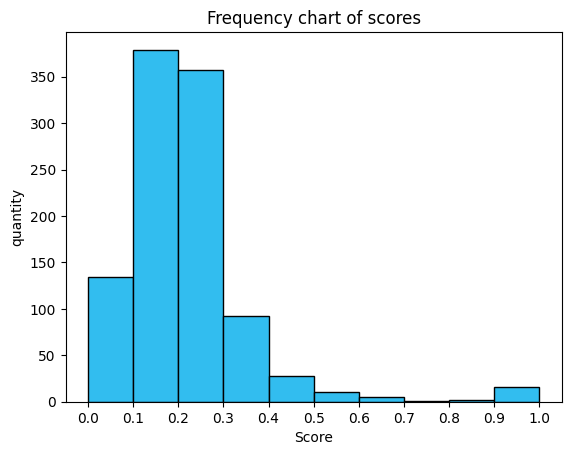

In [12]:
# Chia khoảng từ 0 đến 1 thành các bins (ví dụ: 10 bins)
bins = np.linspace(0, 1, 11)

# Vẽ biểu đồ histogram
plt.hist(word_accuracy, bins=bins, edgecolor='black', color='#32BDEF')
plt.xlabel('Score')
plt.ylabel('quantity')
plt.title('Frequency chart of scores')
plt.xticks(bins)  # Thiết lập các ticks trên trục x
plt.show()